# Perfil de intensidad de imagen por recorte de pixel E4

Este es el rpograma de analisis de imagen del experimento de la camara ccd con el LED, se utiliza por el analisis de pixel

In [16]:
# Importamos las librerias necesarias
import cv2
from PIL import Image
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray 
import matplotlib.pyplot as plt

In [17]:
# Cargamos imagen, se convierte a matriz
image = imread('../Led/L30.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


In [18]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

In [19]:
# Convertimos la imagen a escala de grises
image = rgb2gray(image)

print(type(image))

# Shape of the image
print("Shape of the image", image.shape)

<class 'numpy.ndarray'>
Shape of the image (1024, 1280)


## Recorte por pixel

In [20]:
# Seleccionamos la línea central de la imagen en escala de grises
linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

# Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
centro = len(linea_pixeles) // 2
offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes

# Seleccionamos 5 puntos específicos en la línea central
puntos_seleccionados = [
    centro - 2 * offset,  # Punto 1: A la izquierda del centro
    centro - offset,      # Punto 2: A la izquierda del centro
    centro,               # Punto 3: Punto central
    centro + offset,      # Punto 4: A la derecha del centro
    centro + 2 * offset   # Punto 5: A la derecha del centro
]

# Obtenemos las intensidades correspondientes a estos puntos
intensidades = [linea_pixeles[punto] for punto in puntos_seleccionados]

# Creamos un DataFrame para mostrar las intensidades de los puntos seleccionados
df_puntos_intensidad = pd.DataFrame({
    'Pixel': puntos_seleccionados,
    'Intensidad': intensidades
})

# Mostramos el DataFrame resultante
print(df_puntos_intensidad)

   Pixel  Intensidad
0    384    0.513921
1    512    0.427256
2    640    0.446367
3    768    0.454172
4    896    0.556893


## Analisis para todas las imagenes

In [21]:
# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde B0 hasta B36
for i in range(100):
    # Formateamos el nombre de la imagen
    img_path = f'../Led/L{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Seleccionamos la línea central de la imagen
    linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

    # Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
    centro = len(linea_pixeles) // 2
    offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes

    # Seleccionamos 5 puntos específicos en la línea central
    puntos_seleccionados = [
        centro - 2 * offset,  # Punto 1: A la izquierda del centro
        centro - offset,      # Punto 2: A la izquierda del centro
        centro,               # Punto 3: Punto central
        centro + offset,      # Punto 4: A la derecha del centro
        centro + 2 * offset   # Punto 5: A la derecha del centro
    ]

    # Obtenemos las intensidades correspondientes a estos puntos
    intensidades = [linea_pixeles[punto] for punto in puntos_seleccionados]

    # Guardamos los resultados en la lista
    results.append({
        'Image': f'B{i}.png',
        'Pixel 1': intensidades[0],
        'Pixel 2': intensidades[1],
        'Pixel 3': intensidades[2],
        'Pixel 4': intensidades[3],
        'Pixel 5': intensidades[4]
    })

# Convertimos los resultados a un DataFrame
df_results = pd.DataFrame(results)

# Mostramos el DataFrame resultante
print(df_results)

      Image   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5
0    B0.png  0.003088  0.003088  0.003088  0.003088  0.003088
1    B1.png  0.015745  0.020508  0.020240  0.020791  0.017695
2    B2.png  0.026989  0.026126  0.017992  0.026691  0.030069
3    B3.png  0.031200  0.024176  0.029236  0.024458  0.028670
4    B4.png  0.032613  0.040189  0.026727  0.034571  0.040204
..      ...       ...       ...       ...       ...       ...
95  B95.png  0.995245  0.995245  0.995245  0.995245  0.995245
96  B96.png  0.995245  0.995245  0.995245  0.995245  0.995245
97  B97.png  0.995245  0.995245  0.995245  0.995245  0.995245
98  B98.png  0.995245  0.995245  0.995245  0.995245  0.995245
99  B99.png  0.995245  0.995245  0.995245  0.995245  0.995245

[100 rows x 6 columns]


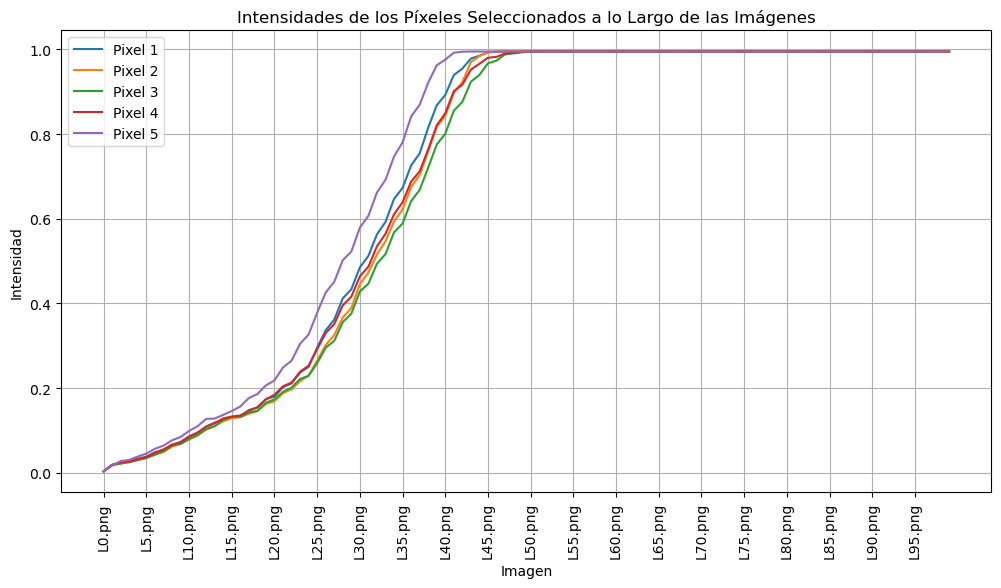

In [29]:
# Graficamos los resultados
plt.figure(figsize=(12, 6))
for i in range(1, 6):
    plt.plot(df_results['Image'], df_results[f'Pixel {i}'], label=f'Pixel {i}')

plt.xlabel('Imagen')
plt.ylabel('Intensidad')
plt.title('Intensidades de los Píxeles Seleccionados a lo Largo de las Imágenes')
plt.legend()
plt.grid(True)
plt.xticks(ticks=range(0, len(df_results['Image']), 5), rotation=90)
plt.show()

## Analisis de imagen por seccion de pixel

In [26]:
# Lista para almacenar las intensidades promedio
promedios_intensidad = []

# Recorremos cada punto seleccionado para calcular el promedio de intensidad en un cuadrado de 5x5 píxeles
for punto in puntos_seleccionados:
    # Definimos el rango de filas y columnas para el cuadrado 5x5
    fila_inicio = max(0, (image.shape[0] // 2) - 2)
    fila_fin = min(image.shape[0], (image.shape[0] // 2) + 3)
    columna_inicio = max(0, punto - 2)
    columna_fin = min(image.shape[1], punto + 3)
    
    # Extraemos la región 5x5 alrededor del punto
    region = image[fila_inicio:fila_fin, columna_inicio:columna_fin]
    
    # Calculamos el promedio de intensidad en la región
    promedio_intensidad = np.mean(region)
    
    # Guardamos el promedio en la lista
    promedios_intensidad.append(promedio_intensidad)

# Creamos un DataFrame para mostrar los promedios de intensidad
df_promedios_intensidad = pd.DataFrame({
    'Pixel': puntos_seleccionados,
    'Intensidad Promedio 5x5': promedios_intensidad
})

# Mostramos el DataFrame resultante
print(df_promedios_intensidad)

   Pixel  Intensidad Promedio 5x5
0    384                 0.995245
1    512                 0.995245
2    640                 0.995245
3    768                 0.995245
4    896                 0.995245


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray

# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde L0 hasta L99 (100 imágenes)
for i in range(100):
    # Formateamos el nombre de la imagen
    img_path = f'../Led/L{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Seleccionamos la línea central de la imagen
    linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

    # Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
    centro = len(linea_pixeles) // 2
    offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes

    # Seleccionamos 5 puntos específicos en la línea central
    puntos_seleccionados = [
        centro - 2 * offset,  # Punto 1: A la izquierda del centro
        centro - offset,      # Punto 2: A la izquierda del centro
        centro,               # Punto 3: Punto central
        centro + offset,      # Punto 4: A la derecha del centro
        centro + 2 * offset   # Punto 5: A la derecha del centro
    ]

    # Lista para almacenar las intensidades promedio
    promedios_intensidad = []

    # Recorremos cada punto seleccionado para calcular el promedio de intensidad en un cuadrado de 5x5 píxeles
    for punto in puntos_seleccionados:
        # Definimos el rango de filas y columnas para el cuadrado 5x5
        fila_inicio = max(0, (image.shape[0] // 2) - 2)
        fila_fin = min(image.shape[0], (image.shape[0] // 2) + 3)
        columna_inicio = max(0, punto - 2)
        columna_fin = min(image.shape[1], punto + 3)
        
        # Extraemos la región 5x5 alrededor del punto
        region = image[fila_inicio:fila_fin, columna_inicio:columna_fin]
        
        # Calculamos el promedio de intensidad en la región
        promedio_intensidad = np.mean(region)
        
        # Guardamos el promedio en la lista
        promedios_intensidad.append(promedio_intensidad)

    # Guardamos los resultados en la lista
    results.append({
        'Image': f'L{i}.png',
        'Pixel 1': promedios_intensidad[0],
        'Pixel 2': promedios_intensidad[1],
        'Pixel 3': promedios_intensidad[2],
        'Pixel 4': promedios_intensidad[3],
        'Pixel 5': promedios_intensidad[4]
    })

# Convertimos los resultados a un DataFrame
df_results = pd.DataFrame(results)

      Image   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5
0    L0.png  0.003088  0.003088  0.003088  0.003088  0.003088
1    L1.png  0.018624  0.017566  0.018253  0.018480  0.016875
2    L2.png  0.024542  0.022356  0.021235  0.024168  0.027396
3    L3.png  0.028234  0.025016  0.025096  0.025695  0.030204
4    L4.png  0.032685  0.029730  0.029818  0.031994  0.038078
..      ...       ...       ...       ...       ...       ...
95  L95.png  0.995245  0.995245  0.995245  0.995245  0.995245
96  L96.png  0.995245  0.995245  0.995245  0.995245  0.995245
97  L97.png  0.995245  0.995245  0.995245  0.995245  0.995245
98  L98.png  0.995245  0.995245  0.995245  0.995245  0.995245
99  L99.png  0.995245  0.995245  0.995245  0.995245  0.995245

[100 rows x 6 columns]


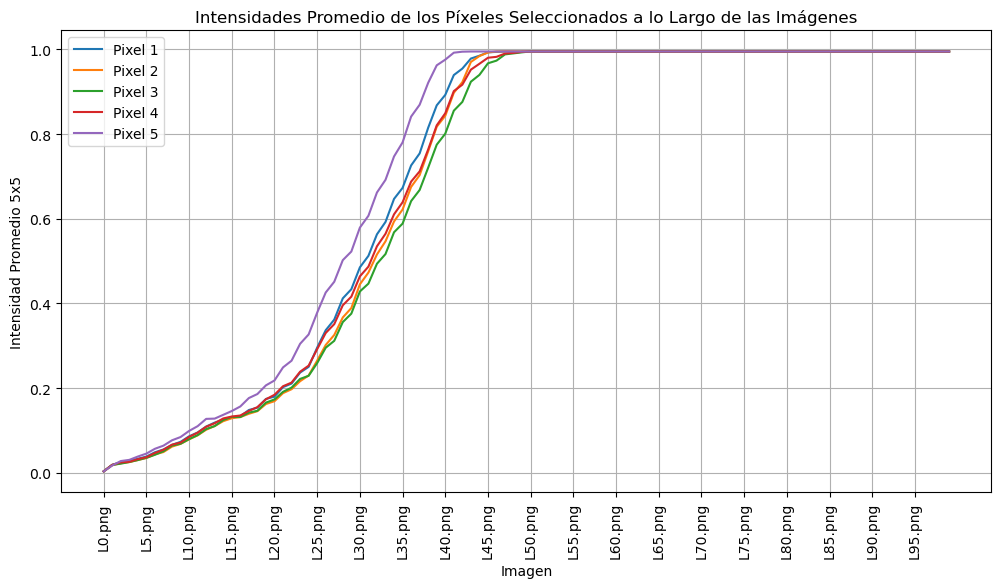

In [28]:
# Mostramos el DataFrame resultante
print(df_results)

# Graficamos los resultados
plt.figure(figsize=(12, 6))
for i in range(1, 6):
    plt.plot(df_results['Image'], df_results[f'Pixel {i}'], label=f'Pixel {i}')

plt.xlabel('Imagen')
plt.ylabel('Intensidad Promedio 5x5')
plt.title('Intensidades Promedio de los Píxeles Seleccionados a lo Largo de las Imágenes')
plt.legend()
plt.grid(True)

# Mostrar las leyendas del eje x de 5 en 5
plt.xticks(ticks=range(0, len(df_results['Image']), 5), rotation=90)
plt.show()
